### Dataset Diabetes de Scikit-learn 

Prediccón de la progresión de la diabetes en función de diversos factores.

In [12]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["DiseaseProgression"] = diabetes.target  # Variable objetivo

# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["DiseaseProgression"])  # Variables predictoras
y = df["DiseaseProgression"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de DiseaseProgression: {y.min()}")
print(f"Valor máximo de DiseaseProgression: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}") # Asegurar que X_scaled y y tienen el mismo número de filas

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["DiseaseProgression"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["DiseaseProgression"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Valor mínimo de DiseaseProgression: 25.0
Valor máximo de DiseaseProgression: 346.0
Tamaño de X_scaled: (442, 10), Tamaño de y: (442,)
Correlaciones con la variable objetivo:
DiseaseProgression    1.000000
bmi                   0.586450
s5                    0.565883
bp                    0.441482
s4                    0.430453
s6                    0.382483
s1                    0.212022
age                   0.187889
s2                    0.174054
sex                   0.043062
s3                   -0.394789
Name: DiseaseProgression, dtype: float64
VIF de cada variable:
  Variable        VIF
0      age   1.217307
1      sex   1.278071
2      bmi   1.509437
3       bp   1.459428
4       s1  59.202510
5       s2  39.193370
6       s3  15.402156
7       s4   8.890986
8       s5  10.075967
9       s6   1.484623
Intercepto: 151.3456045398599
Coeficientes del modelo:
age     1.802910
sex   -11.509071
bmi    25.800705
bp     16.538585
s1    -44.306406
s2     24.641710
s3      7.773096
s4    

### Análisis de los resultados
#### Verificación del tamaño de los datos
<br>
✅ Todo bien, X_scaled y y tienen la misma cantidad de filas (442 muestras). Esto confirma que los datos están correctamente alineados.
#### Análisis de la Correlación con la variable objetivo:
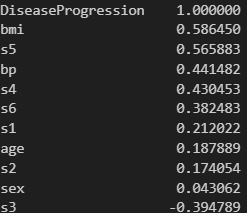 <br> <br>
Observamos que la variable ``bmi`` es la que posee una correlación mas alta, por lo que más información aporta para la predicción de nuestro modelo. <br>
Por otro lado, variables como ``bp`` y ``s4`` o ``age`` y ``s2`` poseen corralaciones muy parecidas por lo que deberiamos quedarnos solo con una de ellas basándonos en criterio experto.<br>
Finalmente, deberiamos eliminar las variables ``sex`` y ``s3`` debido a que poseen correlaciones muy bajas.

#### Verificación de la Multicolinealidad con VIF:
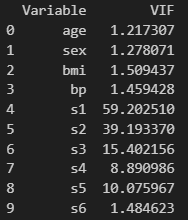 <br><br>
Escala de valores del VIF:
- VIF < 5 → No hay problema de colinealidad.
- VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
- VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

Basándonos en estos resultados podemos apreciar que las variables ``s1``, ``s2``, ``s3``, ``s4`` y ``s5`` poseen un VIF muy elevado por que tendríamos que proceder a su eliminación.
#### Interpretación de los Coeficiente:
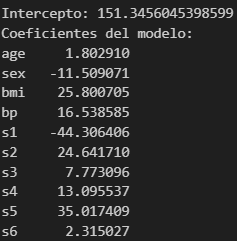 <br><br>
- ``sex (-11)`` y ``s1 (-44)``: Coeficientes muy bajos, no aportan al modelo.
- ``bmi``, ``bp``, ``s2``, ``s3``, ``s4`` y ``s5``: Coeficientes muy altos, indican una gran correlación con la variable objetivo.
- ``age`` y ``s6`` : Coeficientes algo elevados
#### Evaluación del Modelo
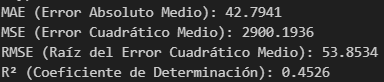<br><br>
- MAE = 42.7 → En promedio, el modelo se equivoca en 42.7 unidades del progreso de la diabetes.
- MSE = 53.8 → Penaliza más los errores grandes
- R² = 0.452 → El modelo solo explica el 45.2% de la variabilidad en los precios de vivienda.

## Segundo intento
En este caso y basándonos en el análisis anterior, he eliminado las variables ``s1``, ``s2``, ``s3``, ``s4``, ``s5`` y ``sex``

In [14]:
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["DiseaseProgression"] = diabetes.target  # Variable objetivo

# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["DiseaseProgression", "s1", "s2", "s3", "s4", "s5", "sex"])  # Variables predictoras
y = df["DiseaseProgression"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de DiseaseProgression: {y.min()}")
print(f"Valor máximo de DiseaseProgression: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["DiseaseProgression"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["DiseaseProgression"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Valor mínimo de DiseaseProgression: 25.0
Valor máximo de DiseaseProgression: 346.0
Correlaciones con la variable objetivo:
DiseaseProgression    1.000000
bmi                   0.586450
bp                    0.441482
s6                    0.382483
age                   0.187889
Name: DiseaseProgression, dtype: float64
VIF de cada variable:
  Variable       VIF
0      age  1.172270
1      bmi  1.283947
2       bp  1.362082
3       s6  1.324678
Intercepto: 151.6004862137656
Coeficientes del modelo:
age     0.778572
bmi    37.074257
bp     16.216477
s6      8.992869
dtype: float64
MAE (Error Absoluto Medio): 49.7136
MSE (Error Cuadrático Medio): 3666.0193
RMSE (Raíz del Error Cuadrático Medio): 60.5477
R² (Coeficiente de Determinación): 0.3081


#### Conclusión
Nuestro coeficiente de determinación es peor que el de nuestra anterior prueba, en este caso este modelo solo explicaría un 30.8% de la variabilidad del progreso de la diabetes (0.308) <br>
El modelo necesita más complejidad, 4 variables no son suficientes para capturar toda la variabilidad de los precios. Necesitamos más variables relevantes o cambiar de modelo a uno tipo Árbol de decisión o Random Forest.